In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import json
import seaborn as sns

In [187]:
root_dir = "/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/"
models = {'Rotation': '2023-11-29/', 'Translation': '2024-01-17/'}
embeddings = 'dHCP_embeddings'
labels=['Preterm_28', 'Preterm_32', 'Preterm_37']
target = 'train_val_values.json'
metric = 'train_val_auc'

cols = ['Prematurity Class', 'Augmentation', 'AUC']
palette={'Rotation': 'darkred',
         'Translation': 'darkgreen'}

In [188]:
dict_values = {label : {key: [] for key in models.keys()} for label in labels}

In [189]:
for key, model in models.items():
    models_dirs = os.path.join(root_dir,model)
    for label in labels:
        selected_models_dirs = [root for root, dirs, files in os.walk(models_dirs)
                                    if (target in files) & (label in root) & ('best_model' not in root)]
        print(f'{label}, {key}: {selected_models_dirs}')
        values = []
        for directory in selected_models_dirs:
            with open(os.path.join(directory,target), 'r') as f:
                perf = json.load(f)
                value = perf[metric][0]
                values.append(value)
        dict_values[label][key]=values
        

Preterm_28, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/Preterm_28', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/Preterm_28']
Preterm_32, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/Preterm_32', '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/Preterm_32']
Preterm_37, Rotation: ['/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Outp

In [190]:
df = pd.DataFrame([[k1, k2, elem] for k1, v1 in dict_values.items() for k2, list_val in v1.items() for elem in list_val], columns=cols)

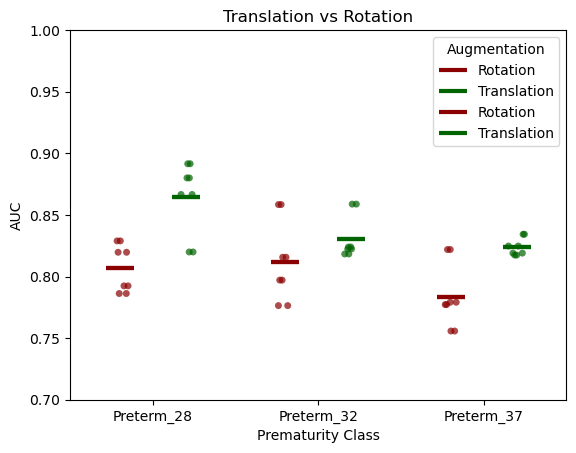

In [192]:
sns.stripplot(
data=df, x="Prematurity Class", y="AUC", hue="Augmentation",
dodge=True, alpha=.7, legend=False,
palette=palette
)
sns.pointplot(
    data=df, x="Prematurity Class", y="AUC", hue="Augmentation",
    dodge=.4, linestyle="none", errorbar=None,
    marker="_", markersize=20, markeredgewidth=3,
    palette=palette
)
#ax.set_title(side_name)
plt.ylim(0.7, 1)
plt.title('Translation vs Rotation')
plt.show()

In [193]:
# plot AUC depending on the learning rate
# use config diff

On peut changer le répertoire dans lequel on cherche les valeurs. Mais config diff ne va pas comparer les dates différentes : il faudrait créer un comparateur de config global ? C'est un peu compliqué... Voir WandB ?

In [23]:
models = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-26/'
df_configs = pd.read_csv(models+'config_diff.csv')
df_configs.columns = ['model'] + df_configs.columns.tolist()[1:]

label='Right_PCS'
target = 'train_val_values.json'
metric = 'train_val_auc'

In [24]:
# find existing perf directories
selected_models_dirs = [root for root, dirs, files in os.walk(models)
                            if (target in files) & (label in root) & ('best_model' not in root)]
directories = []
values = []
for idx, directory in enumerate(selected_models_dirs):
    with open(os.path.join(directory,target), 'r') as f:
        perf = json.load(f)
        value = perf[metric][0]
    directories.append(directory)
    values.append(value)

In [25]:
data = {'name': directories, 'value': values}
df_values = pd.DataFrame.from_dict(data)

In [26]:
values_configs = []
mod_names = []
for row in df_configs.iterrows():
    mod_name = row[1].model
    if df_values['name'].str.contains(mod_name + '/').sum() == 1:
        row = df_values[df_values['name'].str.contains(mod_name + '/')]
        val = row.value.tolist()[0]
        values_configs.append(val)
        mod_names.append(mod_name)

In [27]:
data = {'model': mod_names, 'value': values_configs}
df_values = pd.DataFrame.from_dict(data)

In [199]:
df = pd.merge(df_configs, df_values)

In [ ]:
# convert lr to str for stripplot
df['lr']=np.array(df['lr']).astype(str)

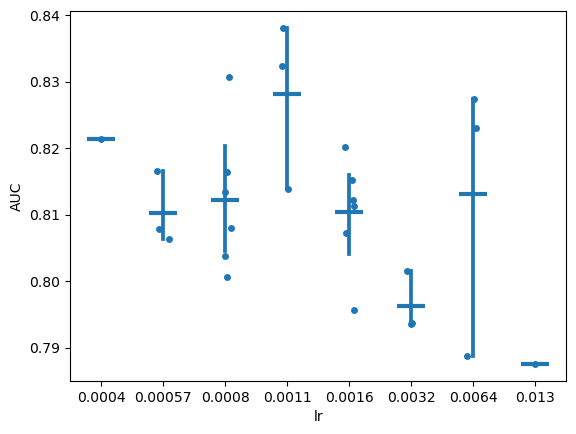

In [222]:
sns.stripplot(data=df, x='lr', y='value')
#plt.xscale('log')
sns.pointplot(
    data=df, x="lr", y="value",
    linestyle="none", errorbar=('ci', 95),
    marker="_", markersize=20, markeredgewidth=3)
plt.ylabel('AUC')
plt.show()

In [35]:
# retrieve the parameters manually when not present in config diff (parameters which were not added to parameters_to_keep...)
# trimdepth max_distance
data = {'model': ['19-06-17_0/', '16-33-55_0/', '19-06-17_1/', '16-33-55_1/', '19-06-17_2/', '16-33-55_2/', '13-09-40_156/', '16-33-55_3/', '19-06-17_3/', '16-33-55_4/', '19-06-17_4/', '16-33-55_4/'],
        'max_distance':range(0,12)}

In [36]:
models_dirs = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-31/'

In [37]:
x,y=[],[]
for model, max_dist in zip(data['model'], data['max_distance']):
    print(model, max_dist)
    x.append(max_dist)
    with open(models_dirs+model+'ACC_embeddings/Right_PCS/train_val_values.json', 'r') as f:
        auc = json.load(f)
    auc = auc['train_val_auc'][0]
    y.append(auc)

19-06-17_0/ 0
16-33-55_0/ 1
19-06-17_1/ 2
16-33-55_1/ 3
19-06-17_2/ 4
16-33-55_2/ 5
13-09-40_156/ 6
16-33-55_3/ 7
19-06-17_3/ 8
16-33-55_4/ 9
19-06-17_4/ 10
16-33-55_4/ 11


In [38]:
x.append(-1)
with open('/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-02-01/11-59-39_147/ACC_embeddings/Right_PCS/train_val_values.json', 'r') as f:
    auc = json.load(f)
    auc = auc['train_val_auc'][0]
    y.append(auc)

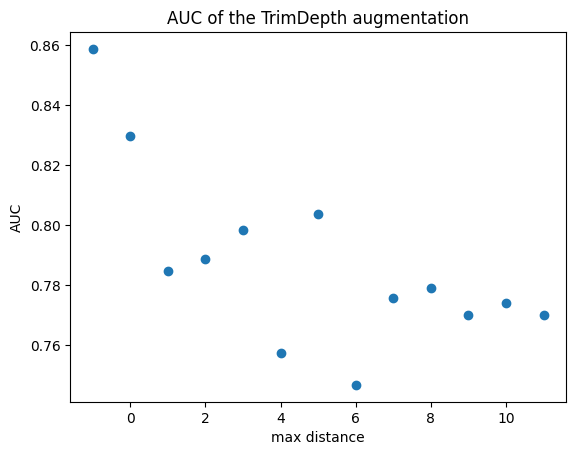

In [40]:
fig,ax = plt.subplots()
ax.scatter(x,y)
ax.set_xlabel('max distance')
ax.set_ylabel('AUC')
ax.set_title('AUC of the TrimDepth augmentation')
plt.show()

In [21]:
models_dirs = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/'
label='Sex'
target='train_val_values.json'
metric = 'train_val_auc'
embeddings = 'UKB'
model_name = 'translation'
model_name = ''
dict_values={}
selected_models_dirs = [root for root, dirs, files in os.walk(models_dirs)
                            if (target in files) & (label in root) & (embeddings in root) & (model_name in root) & ('best_model' not in root)]
print(f'{label}: {selected_models_dirs}')
dict_values = {'model': [], label: []}
for directory in selected_models_dirs:
    with open(os.path.join(directory,target), 'r') as f:
        perf = json.load(f)
        value = perf[metric][0]
        dict_values['model'].append(directory.replace(models_dirs, ''))
        dict_values[label].append(value)

Right_PCS: ['/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/16-24-09_1/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/16-24-09_6/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/16-24-09_7/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/16-24-09_3/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/16-24-09_2/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/16-24-09_4/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/16-24-09_12/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/16-24-09_11/ACC_1_embeddings/Right_PCS', '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel_no_bottom/

In [22]:
df = pd.DataFrame.from_dict(dict_values)

In [23]:
print(df)

                                     model  Right_PCS
0    16-24-09_1/ACC_1_embeddings/Right_PCS   0.874986
1    16-24-09_6/ACC_1_embeddings/Right_PCS   0.859000
2    16-24-09_7/ACC_1_embeddings/Right_PCS   0.861296
3    16-24-09_3/ACC_1_embeddings/Right_PCS   0.883648
4    16-24-09_2/ACC_1_embeddings/Right_PCS   0.864451
5    16-24-09_4/ACC_1_embeddings/Right_PCS   0.871380
6   16-24-09_12/ACC_1_embeddings/Right_PCS   0.846268
7   16-24-09_11/ACC_1_embeddings/Right_PCS   0.850169
8    16-24-09_5/ACC_1_embeddings/Right_PCS   0.858676
9   16-24-09_10/ACC_1_embeddings/Right_PCS   0.864775
10   16-24-09_0/ACC_1_embeddings/Right_PCS   0.855592
11  16-24-09_13/ACC_1_embeddings/Right_PCS   0.870930
12  16-24-09_14/ACC_1_embeddings/Right_PCS   0.845761
13   16-24-09_9/ACC_1_embeddings/Right_PCS   0.876676
14   16-24-09_8/ACC_1_embeddings/Right_PCS   0.851662


In [10]:
df_configs = pd.read_csv(models_dirs+'config_diff.csv')
df_configs.columns = ['model'] + df_configs.columns.tolist()[1:]

In [11]:
#mods = df_configs.loc[df_configs['percentage']==30]['model']
#mods = df_configs.loc[df_configs['patch_size']=='[1, 11, 25, 25]']['model']
mods = df['model'].tolist()
val_list=[]
for model in mods:
    val = df.loc[df['model'].str.contains(model)][label].tolist()[0]
    val_list.append(val)
print(val_list)
print(np.mean(val_list))
print(np.std(val_list))

[0.556401134911602, 0.5689784869089667, 0.5336122711966714, 0.5650442056285407, 0.5698204011745022, 0.5426680184707184, 0.5444272245550479, 0.5397538894684608]
0.5525882040393139
0.013346805487133257
